Epoch 1/20
782/782 [==============================] - 11s 12ms/step - loss: 1.7187 - accuracy: 0.3847 - val_loss: 1.4846 - val_accuracy: 0.4708
Epoch 2/20
782/782 [==============================] - 9s 12ms/step - loss: 1.5620 - accuracy: 0.4443 - val_loss: 1.3682 - val_accuracy: 0.5152
Epoch 3/20
782/782 [==============================] - 9s 11ms/step - loss: 1.5220 - accuracy: 0.4616 - val_loss: 1.3262 - val_accuracy: 0.5308
Epoch 4/20
782/782 [==============================] - 9s 11ms/step - loss: 1.4997 - accuracy: 0.4655 - val_loss: 1.3201 - val_accuracy: 0.5326
Epoch 5/20
782/782 [==============================] - 9s 11ms/step - loss: 1.4806 - accuracy: 0.4736 - val_loss: 1.3053 - val_accuracy: 0.5382
Epoch 6/20
782/782 [==============================] - 9s 11ms/step - loss: 1.4625 - accuracy: 0.4824 - val_loss: 1.3224 - val_accuracy: 0.5272
Epoch 7/20
782/782 [==============================] - 9s 11ms/step - loss: 1.4536 - accuracy: 0.4845 - val_loss: 1.2894 - val_accuracy: 0.542

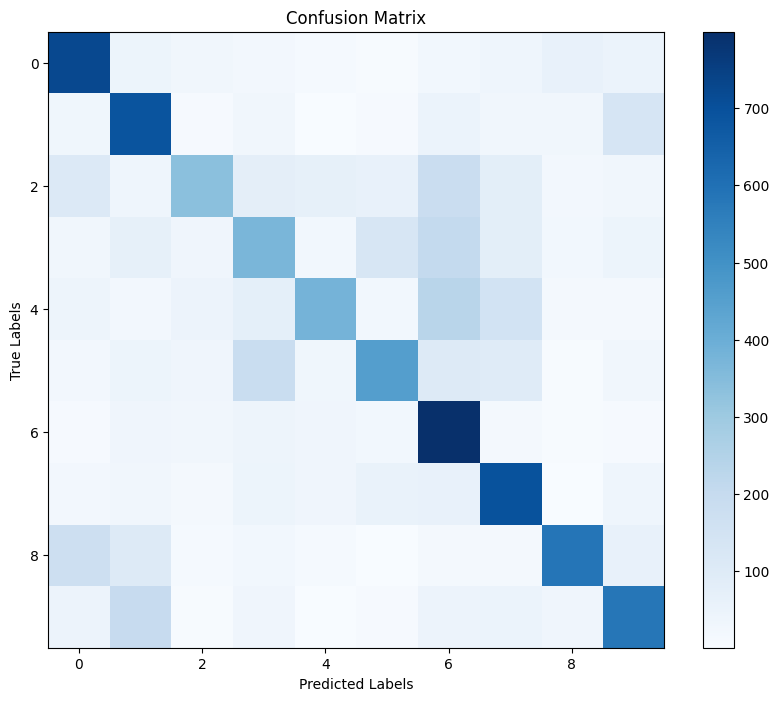

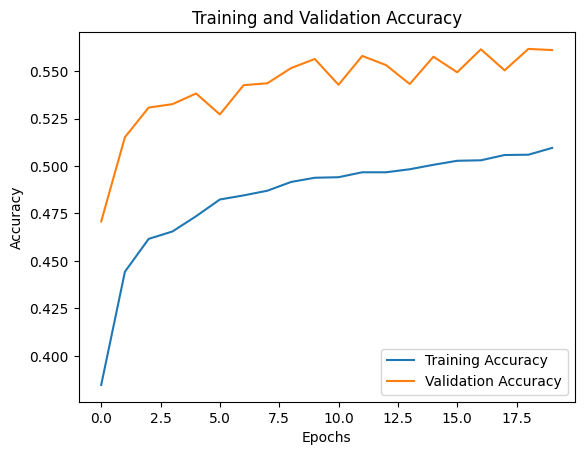

In [1]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Business Understanding
# Objective: Classify CIFAR-10 images into 10 categories using a pretrained VGG19 model.

# Step 2: Data Understanding
# CIFAR-10 dataset contains 60,000 32x32 color images in 10 classes, with 6,000 images per class.

# Load CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Define class names
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Step 3: Data Preparation
# Normalize pixel values and one-hot encode labels
x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Augment the data
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow(x_train, y_train, batch_size=64)

# Step 4: Modeling
# Load pretrained VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the base model
base_model.trainable = False

# Add custom classification layers
global_average_layer = Flatten()(base_model.output)
dense_layer = Dense(256, activation='relu')(global_average_layer)
dropout_layer = Dropout(0.5)(dense_layer)
output_layer = Dense(10, activation='softmax')(dropout_layer)

# Create the model
model = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Step 5: Evaluation
# Early stopping and model checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('vgg19_cifar10.h5', save_best_only=True, monitor='val_accuracy')

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping, model_checkpoint]
)

# Step 6: Deployment
# Evaluate the model
val_loss, val_accuracy = model.evaluate(x_test, y_test)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

# Classification report
predictions = np.argmax(model.predict(x_test), axis=1)
true_labels = np.argmax(y_test, axis=1)

print(classification_report(true_labels, predictions, target_names=class_names))

# Confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.colorbar()
plt.show()

# Visualize training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Epoch 1/30
782/782 [==============================] - 24s 29ms/step - loss: 2.3777 - accuracy: 0.2537 - val_loss: 3.3229 - val_accuracy: 0.2232
Epoch 2/30
782/782 [==============================] - 21s 27ms/step - loss: 1.5953 - accuracy: 0.4481 - val_loss: 1.3098 - val_accuracy: 0.5695
Epoch 3/30
782/782 [==============================] - 21s 27ms/step - loss: 1.1749 - accuracy: 0.5960 - val_loss: 1.2065 - val_accuracy: 0.6046
Epoch 4/30
782/782 [==============================] - 22s 28ms/step - loss: 0.9795 - accuracy: 0.6659 - val_loss: 0.7425 - val_accuracy: 0.7554
Epoch 5/30
782/782 [==============================] - 22s 28ms/step - loss: 0.8652 - accuracy: 0.7106 - val_loss: 0.6611 - val_accuracy: 0.7829
Epoch 6/30
782/782 [==============================] - 21s 27ms/step - loss: 0.7898 - accuracy: 0.7407 - val_loss: 0.7000 - val_accuracy: 0.7749
Epoch 7/30
782/782 [==============================] - 22s 28ms/step - loss: 0.7336 - accuracy: 0.7577 - val_loss: 0.5919 - val_accuracy:

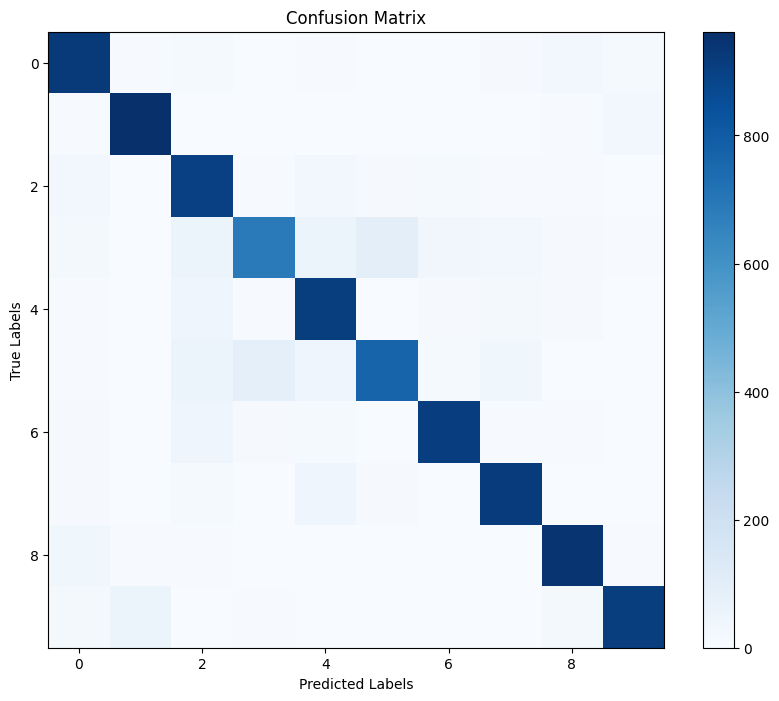

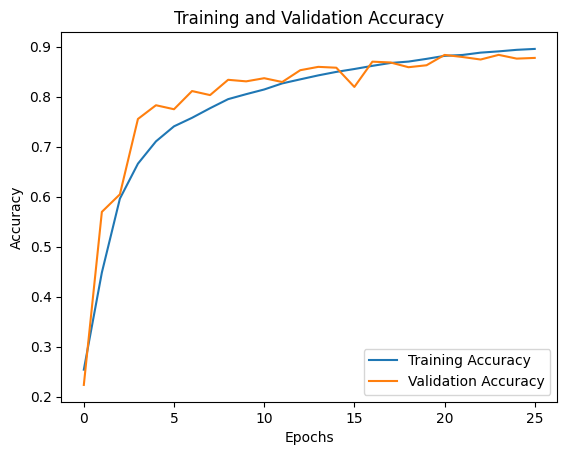

In [2]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Business Understanding
# Objective: Classify CIFAR-10 images into 10 categories using a pretrained VGG19 model.

# Step 2: Data Understanding
# CIFAR-10 dataset contains 60,000 32x32 color images in 10 classes, with 6,000 images per class.

# Load CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Define class names
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Step 3: Data Preparation
# Normalize pixel values and one-hot encode labels
x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Augment the data
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2
)

train_generator = train_datagen.flow(x_train, y_train, batch_size=64)

# Step 4: Modeling
# Load pretrained VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Fine-tune some layers of the base model
for layer in base_model.layers[-4:]:
    layer.trainable = True

# Add custom classification layers
global_average_layer = Flatten()(base_model.output)
dense_layer1 = Dense(512, activation='relu')(global_average_layer)
batch_norm1 = BatchNormalization()(dense_layer1)
dropout_layer1 = Dropout(0.5)(batch_norm1)
dense_layer2 = Dense(256, activation='relu')(dropout_layer1)
batch_norm2 = BatchNormalization()(dense_layer2)
dropout_layer2 = Dropout(0.5)(batch_norm2)
output_layer = Dense(10, activation='softmax')(dropout_layer2)

# Create the model
model = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Step 5: Evaluation
# Early stopping and model checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('vgg19_cifar10.h5', save_best_only=True, monitor='val_accuracy')

# Train the model
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping, model_checkpoint]
)

# Step 6: Deployment
# Evaluate the model
val_loss, val_accuracy = model.evaluate(x_test, y_test)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

# Classification report
predictions = np.argmax(model.predict(x_test), axis=1)
true_labels = np.argmax(y_test, axis=1)

print(classification_report(true_labels, predictions, target_names=class_names))

# Confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.colorbar()
plt.show()

# Visualize training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()